In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
#from google.colab import files

# **Reading Data**

In [2]:
players = pd.read_excel('players (extension).xlsx', index_col = 0)

In [3]:
players.head()

,Name,Country,Current Rating,Potential Rating,Height (cm),Weight (kg),Preferred Foot,Birth Date,Age,Preferred Positions,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Specialities,Traits
0,Lionel Messi,Argentina,94,94,170,72,Left,"June 24, 1987",33,RW ST CF,...,94,75,88,14,6,11,15,8,"Dribbler, Distance Shooter, Crosser, FK Specia...","Finesse Shot, Long Shot Taker (CPU AI Only), S..."
1,Cristiano Ronaldo,Portugal,93,93,187,83,Right,"Feb. 5, 1985",35,ST LW,...,76,85,87,14,7,11,15,11,"Dribbler, Distance Shooter, Acrobat, Clinical ...","Power Free-Kick, Flair, Long Shot Taker (CPU A..."
2,Neymar Jr,Brazil,92,92,175,68,Right,"Feb. 5, 1992",28,LW CAM,...,89,92,87,15,9,9,15,11,"Speedster, Dribbler, Playmaker, Crosser, FK Sp...","Injury Prone, Flair, Speed Dribbler (CPU AI On..."
3,Virgil van Dijk,Netherlands,91,92,193,92,Right,"July 8, 1991",29,CB,...,70,62,45,11,13,10,13,11,"Tackling, Tactician, Strength, Complete Defender","Leadership, Long Passer (CPU AI Only), Power H..."
4,Jan Oblak,Slovenia,91,93,188,87,Right,"Jan. 7, 1993",27,GK,...,14,11,13,90,87,92,78,89,No,"GK Long Throw, Comes For Crosses"


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 2940 non-null   object
 1   Country              2940 non-null   object
 2   Current Rating       2940 non-null   int64 
 3   Potential Rating     2940 non-null   int64 
 4   Height (cm)          2940 non-null   int64 
 5   Weight (kg)          2940 non-null   int64 
 6   Preferred Foot       2940 non-null   object
 7   Birth Date           2940 non-null   object
 8   Age                  2940 non-null   int64 
 9   Preferred Positions  2940 non-null   object
 10  Player Work Rate     2940 non-null   object
 11  Weak Foot            2940 non-null   int64 
 12  Skill Moves          2940 non-null   int64 
 13  Value (€)            2940 non-null   int64 
 14  Wage (€)             2940 non-null   int64 
 15  Team                 2940 non-null   object
 16  Positi

# **Preprocessing**

In [5]:
players[['Current Rating', 'Potential Rating', 'Wage (€)', 'Value (€)']].corr()

,Current Rating,Potential Rating,Wage (€),Value (€)
Current Rating,1.000000,0.652683,0.675215,0.733450
Potential Rating,0.652683,1.000000,0.540412,0.690986
Wage (€),0.675215,0.540412,1.000000,0.847953
Value (€),0.733450,0.690986,0.847953,1.000000


In [6]:
# creating X-matrix and Y-vector
x = players.loc[:, ['Height (cm)', 'Weight (kg)', 'Age', 'Weak Foot', 'Skill Moves', 'Contract Length',
                    'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
                    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass', 'Long Pass',
                    'Acceleration', 'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility',
                    'Jumping', 'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties',
                    'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes']].values.copy()
y = players.loc[:, 'Value (€)'].values.copy()

In [7]:
# normalization of the matrix X
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

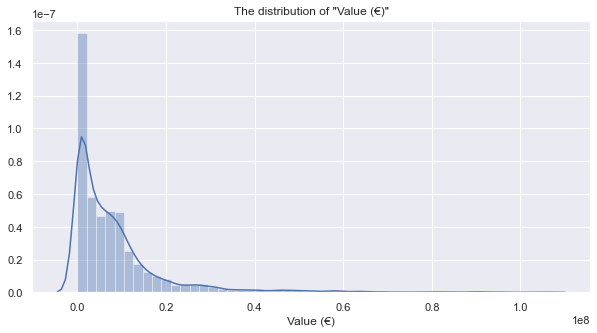

In [8]:
plt.figure(figsize = (10, 5))
sns.distplot(a = players['Value (€)'])
plt.title('The distribution of "Value (€)"')
plt.show()

In [9]:
# normalization of the vector Y
y = y / 1000000

# **Modeling**

In [10]:
# train, validation and test splits
x_train, x_val_test, y_train, y_val_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5, random_state = 42)
# conver to tensor
## train data
tensor_x_train = tf.convert_to_tensor(value = x_train, dtype = tf.float32)
tensor_y_train = tf.convert_to_tensor(value = y_train, dtype = tf.float32)
## validation data
tensor_x_val = tf.convert_to_tensor(value = x_val, dtype = tf.float32)
tensor_y_val = tf.convert_to_tensor(value = y_val, dtype = tf.float32)
## test data
tensor_x_test = tf.convert_to_tensor(value = x_test, dtype = tf.float32)
tensor_y_test = tf.convert_to_tensor(value = y_test, dtype = tf.float32)

# reshape y vectors for Loss
tensor_y_train = tf.reshape(tensor_y_train, shape = [len(tensor_y_train), 1])
tensor_y_val = tf.reshape(tensor_y_val, shape = [len(tensor_y_val), 1])
tensor_y_test = tf.reshape(tensor_y_test, shape = [len(tensor_y_test), 1])

### AutoEncoder

In [11]:
from RRJ import RRJ2

dimensionality = tensor_x_train.shape[1] # dimensionality = 40
cardin = tensor_x_train.shape[0] # dimensionality = 40


_, tensor_bases_tangent_spaces = RRJ2(x_train, x_train[range(0,cardin,10)], k = 7, \
                                      code_size1 = 20, code_size2 = 10, batch_size=20, gamma = 1.0, epsilon = 0.1, \
                                      Lambda=10.0, iter_num = 40, steps_number = 1000, learning_rate = 0.0001)
#tensor_bases_tangent_spaces = tf.transpose(tensor_bases_tangent_spaces, perm=[0, 2, 1])

Instructions for updating:
non-resource variables are not supported in the long term
It is much better if batch is a divisor of both x_train.shape[0] and grad_x_train.shape[0]

Step 0, training batch accuracy 73.9599 %
Step 20, training batch accuracy 88.4307 %
Step 40, training batch accuracy 99.1113 %
Step 60, training batch accuracy 73.4482 %
Step 80, training batch accuracy 101.036 %
Step 100, training batch accuracy 120.709 %
Step 120, training batch accuracy 127.372 %
Step 140, training batch accuracy 97.0181 %
Step 160, training batch accuracy 113.199 %
Step 180, training batch accuracy 93.0431 %
Step 200, training batch accuracy 133.505 %
Step 220, training batch accuracy 97.9003 %
Step 240, training batch accuracy 107.031 %
Step 260, training batch accuracy 90.7657 %
Step 280, training batch accuracy 70.7558 %
Step 300, training batch accuracy 71.5034 %
Step 320, training batch accuracy 95.2015 %
Step 340, training batch accuracy 123.847 %
Step 360, training batch accuracy 102

Step 400, training batch accuracy 53.8699 %
Step 420, training batch accuracy 73.4709 %
Step 440, training batch accuracy 64.7713 %
Step 460, training batch accuracy 61.1516 %
Step 480, training batch accuracy 43.4725 %
Step 500, training batch accuracy 52.5959 %
Step 520, training batch accuracy 64.6405 %
Step 540, training batch accuracy 71.6216 %
Step 560, training batch accuracy 58.2793 %
Step 580, training batch accuracy 65.9681 %
Step 600, training batch accuracy 62.3713 %
Step 620, training batch accuracy 65.1672 %
Step 640, training batch accuracy 62.918 %
Step 660, training batch accuracy 56.091 %
Step 680, training batch accuracy 67.1698 %
Step 700, training batch accuracy 66.893 %
Step 720, training batch accuracy 51.7467 %
Step 740, training batch accuracy 44.8194 %
Step 760, training batch accuracy 72.6388 %
Step 780, training batch accuracy 64.0111 %
Step 800, training batch accuracy 55.1791 %
Step 820, training batch accuracy 59.0034 %
Step 840, training batch accuracy 6

Step 980, training batch accuracy 50.9296 %
Step 999, training batch accuracy 46.3349 %
The time of the gradient descent part: 5.140671491622925
The time of the svd part: 0.13662433624267578
Step 0, training batch accuracy 46.3243 %
Step 20, training batch accuracy 42.1168 %
Step 40, training batch accuracy 49.3319 %
Step 60, training batch accuracy 53.579 %
Step 80, training batch accuracy 48.826 %
Step 100, training batch accuracy 49.9609 %
Step 120, training batch accuracy 49.9508 %
Step 140, training batch accuracy 49.303 %
Step 160, training batch accuracy 51.2566 %
Step 180, training batch accuracy 50.4491 %
Step 200, training batch accuracy 43.3238 %
Step 220, training batch accuracy 51.1936 %
Step 240, training batch accuracy 51.6775 %
Step 260, training batch accuracy 44.3857 %
Step 280, training batch accuracy 53.9273 %
Step 300, training batch accuracy 53.2584 %
Step 320, training batch accuracy 40.2461 %
Step 340, training batch accuracy 55.7735 %
Step 360, training batch a

Step 460, training batch accuracy 45.9151 %
Step 480, training batch accuracy 44.3985 %
Step 500, training batch accuracy 49.7959 %
Step 520, training batch accuracy 51.475 %
Step 540, training batch accuracy 42.731 %
Step 560, training batch accuracy 47.6172 %
Step 580, training batch accuracy 43.9098 %
Step 600, training batch accuracy 41.7887 %
Step 620, training batch accuracy 47.9449 %
Step 640, training batch accuracy 46.2087 %
Step 660, training batch accuracy 42.1841 %
Step 680, training batch accuracy 40.8422 %
Step 700, training batch accuracy 53.1552 %
Step 720, training batch accuracy 39.6637 %
Step 740, training batch accuracy 42.7199 %
Step 760, training batch accuracy 42.113 %
Step 780, training batch accuracy 50.4393 %
Step 800, training batch accuracy 44.0992 %
Step 820, training batch accuracy 51.4274 %
Step 840, training batch accuracy 35.2088 %
Step 860, training batch accuracy 41.5697 %
Step 880, training batch accuracy 40.8037 %
Step 900, training batch accuracy 4

The time of the svd part: 0.13410019874572754
Step 0, training batch accuracy 38.4475 %
Step 20, training batch accuracy 39.5856 %
Step 40, training batch accuracy 36.7796 %
Step 60, training batch accuracy 47.032 %
Step 80, training batch accuracy 39.6592 %
Step 100, training batch accuracy 48.2826 %
Step 120, training batch accuracy 33.0905 %
Step 140, training batch accuracy 36.462 %
Step 160, training batch accuracy 36.0431 %
Step 180, training batch accuracy 43.5117 %
Step 200, training batch accuracy 42.8369 %
Step 220, training batch accuracy 39.7688 %
Step 240, training batch accuracy 48.5645 %
Step 260, training batch accuracy 38.7315 %
Step 280, training batch accuracy 32.434 %
Step 300, training batch accuracy 49.4467 %
Step 320, training batch accuracy 41.4049 %
Step 340, training batch accuracy 31.6986 %
Step 360, training batch accuracy 50.2405 %
Step 380, training batch accuracy 41.0181 %
Step 400, training batch accuracy 45.6701 %
Step 420, training batch accuracy 45.94

Step 560, training batch accuracy 37.8626 %
Step 580, training batch accuracy 45.4327 %
Step 600, training batch accuracy 47.6775 %
Step 620, training batch accuracy 39.0387 %
Step 640, training batch accuracy 41.2752 %
Step 660, training batch accuracy 42.7959 %
Step 680, training batch accuracy 44.1827 %
Step 700, training batch accuracy 40.3839 %
Step 720, training batch accuracy 44.1171 %
Step 740, training batch accuracy 37.8497 %
Step 760, training batch accuracy 44.4732 %
Step 780, training batch accuracy 43.0042 %
Step 800, training batch accuracy 39.4363 %
Step 820, training batch accuracy 40.1389 %
Step 840, training batch accuracy 46.8176 %
Step 860, training batch accuracy 34.9479 %
Step 880, training batch accuracy 44.2543 %
Step 900, training batch accuracy 36.7066 %
Step 920, training batch accuracy 39.2763 %
Step 940, training batch accuracy 39.8026 %
Step 960, training batch accuracy 39.5875 %
Step 980, training batch accuracy 39.4246 %
Step 999, training batch accurac

Step 60, training batch accuracy 41.523 %
Step 80, training batch accuracy 38.1369 %
Step 100, training batch accuracy 38.2197 %
Step 120, training batch accuracy 44.59 %
Step 140, training batch accuracy 33.5126 %
Step 160, training batch accuracy 42.5412 %
Step 180, training batch accuracy 35.2699 %
Step 200, training batch accuracy 37.451 %
Step 220, training batch accuracy 38.122 %
Step 240, training batch accuracy 37.3074 %
Step 260, training batch accuracy 37.2172 %
Step 280, training batch accuracy 43.533 %
Step 300, training batch accuracy 37.6845 %
Step 320, training batch accuracy 30.4297 %
Step 340, training batch accuracy 38.6416 %
Step 360, training batch accuracy 39.7282 %
Step 380, training batch accuracy 41.0056 %
Step 400, training batch accuracy 45.4038 %
Step 420, training batch accuracy 33.4352 %
Step 440, training batch accuracy 31.5898 %
Step 460, training batch accuracy 38.0402 %
Step 480, training batch accuracy 38.0788 %
Step 500, training batch accuracy 36.540

Step 620, training batch accuracy 32.4192 %
Step 640, training batch accuracy 37.4403 %
Step 660, training batch accuracy 25.946 %
Step 680, training batch accuracy 29.0437 %
Step 700, training batch accuracy 31.0585 %
Step 720, training batch accuracy 34.2286 %
Step 740, training batch accuracy 33.3243 %
Step 760, training batch accuracy 30.2786 %
Step 780, training batch accuracy 36.1943 %
Step 800, training batch accuracy 31.2987 %
Step 820, training batch accuracy 25.5471 %
Step 840, training batch accuracy 36.3291 %
Step 860, training batch accuracy 30.8798 %
Step 880, training batch accuracy 27.5009 %
Step 900, training batch accuracy 37.474 %
Step 920, training batch accuracy 30.9537 %
Step 940, training batch accuracy 39.2009 %
Step 960, training batch accuracy 33.8016 %
Step 980, training batch accuracy 33.7572 %
Step 999, training batch accuracy 31.4373 %
The time of the gradient descent part: 5.132419586181641
The time of the svd part: 0.13211297988891602
Step 0, training ba

Step 120, training batch accuracy 33.3063 %
Step 140, training batch accuracy 26.6597 %
Step 160, training batch accuracy 25.1213 %
Step 180, training batch accuracy 33.6957 %
Step 200, training batch accuracy 27.3767 %
Step 220, training batch accuracy 37.2129 %
Step 240, training batch accuracy 30.7152 %
Step 260, training batch accuracy 31.9359 %
Step 280, training batch accuracy 28.3592 %
Step 300, training batch accuracy 28.9509 %
Step 320, training batch accuracy 25.8668 %
Step 340, training batch accuracy 31.2572 %
Step 360, training batch accuracy 28.6429 %
Step 380, training batch accuracy 25.3974 %
Step 400, training batch accuracy 29.1094 %
Step 420, training batch accuracy 35.0664 %
Step 440, training batch accuracy 29.0777 %
Step 460, training batch accuracy 25.3471 %
Step 480, training batch accuracy 33.521 %
Step 500, training batch accuracy 35.8348 %
Step 520, training batch accuracy 28.575 %
Step 540, training batch accuracy 26.7135 %
Step 560, training batch accuracy 

Step 640, training batch accuracy 30.0389 %
Step 660, training batch accuracy 30.6825 %
Step 680, training batch accuracy 27.5994 %
Step 700, training batch accuracy 30.2566 %
Step 720, training batch accuracy 27.3375 %
Step 740, training batch accuracy 26.9079 %
Step 760, training batch accuracy 24.1883 %
Step 780, training batch accuracy 24.6361 %
Step 800, training batch accuracy 23.958 %
Step 820, training batch accuracy 35.4661 %
Step 840, training batch accuracy 30.8547 %
Step 860, training batch accuracy 22.9058 %
Step 880, training batch accuracy 29.3097 %
Step 900, training batch accuracy 32.1266 %
Step 920, training batch accuracy 36.0558 %
Step 940, training batch accuracy 32.9504 %
Step 960, training batch accuracy 26.0051 %
Step 980, training batch accuracy 24.0752 %
Step 999, training batch accuracy 22.8217 %
The time of the gradient descent part: 4.90535569190979
The time of the svd part: 0.13608336448669434
Step 0, training batch accuracy 22.8102 %
Step 20, training bat

Step 140, training batch accuracy 21.8694 %
Step 160, training batch accuracy 28.2433 %
Step 180, training batch accuracy 30.3979 %
Step 200, training batch accuracy 34.5629 %
Step 220, training batch accuracy 30.6406 %
Step 240, training batch accuracy 24.4363 %
Step 260, training batch accuracy 23.3555 %
Step 280, training batch accuracy 26.032 %
Step 300, training batch accuracy 28.2859 %
Step 320, training batch accuracy 22.7395 %
Step 340, training batch accuracy 25.3864 %
Step 360, training batch accuracy 26.553 %
Step 380, training batch accuracy 27.4173 %
Step 400, training batch accuracy 29.1252 %
Step 420, training batch accuracy 25.496 %
Step 440, training batch accuracy 28.3501 %
Step 460, training batch accuracy 25.9731 %
Step 480, training batch accuracy 26.9411 %
Step 500, training batch accuracy 28.5746 %
Step 520, training batch accuracy 22.3297 %
Step 540, training batch accuracy 23.0261 %
Step 560, training batch accuracy 21.3102 %
Step 580, training batch accuracy 2

Step 680, training batch accuracy 22.0873 %
Step 700, training batch accuracy 21.8093 %
Step 720, training batch accuracy 27.4613 %
Step 740, training batch accuracy 22.9175 %
Step 760, training batch accuracy 30.6191 %
Step 780, training batch accuracy 24.1441 %
Step 800, training batch accuracy 26.6688 %
Step 820, training batch accuracy 23.4765 %
Step 840, training batch accuracy 22.7169 %
Step 860, training batch accuracy 22.973 %
Step 880, training batch accuracy 26.1398 %
Step 900, training batch accuracy 25.0144 %
Step 920, training batch accuracy 21.7278 %
Step 940, training batch accuracy 24.5558 %
Step 960, training batch accuracy 29.1605 %
Step 980, training batch accuracy 24.3772 %
Step 999, training batch accuracy 25.9684 %
The time of the gradient descent part: 4.969609022140503
The time of the svd part: 0.1301279067993164
Step 0, training batch accuracy 25.9462 %
Step 20, training batch accuracy 21.4122 %
Step 40, training batch accuracy 23.4459 %
Step 60, training batch

In [12]:
%store tensor_bases_tangent_spaces

Stored 'tensor_bases_tangent_spaces' (ndarray)
